# Classification of Irises

In 1936, British statistician and biologist Ronald Fisher published The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis.

Two of the three species were collected on the Gaspé Peninsula "all from the same pasture, collected on the same day and measured at the same time by the same person with the same instrument".

The dataset consists of 50 samples from each of the three species of iris.

Four traits were measured for each sample: length and width of sepal and petals in centimetres. 

Identification of the fescue species by the dimensions of the different petals.
    
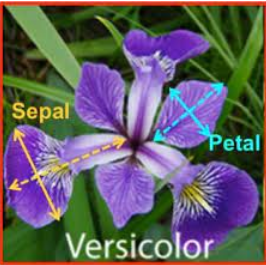

    https://en.wikipedia.org/wiki/Iris_flower_data_set
    https://www.kaggle.com/arshid/iris-flower-dataset

### Iris setosa
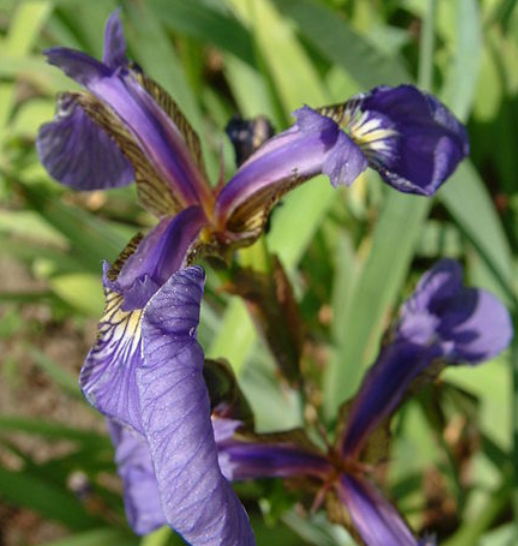

### Iris versicolor
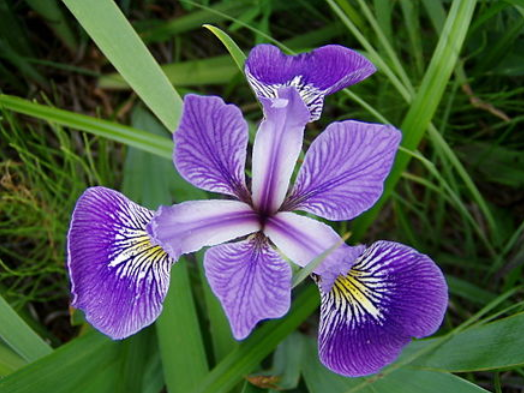

### Iris virginica
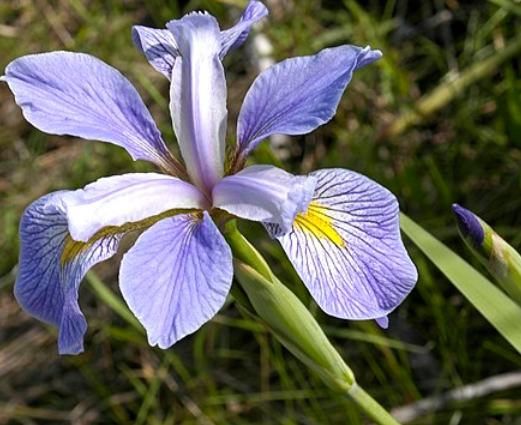

# Task
Create different models that will determine the species of irises according to the measured data.

# Data analysis

In [ ]:
import pandas as pd
data=pd.read_csv('..\\dataset\\IRIS.csv')

File structure information

In [ ]:
data.info()

Data preview

In [ ]:
data.head(10)

Basic statistics

In [ ]:
data.describe()

NULL hodnot control

In [ ]:
data.isnull().sum()

# Data preparation

## Encoding

The species column is text. Mathematical models cannot directly handle strings.

We will have to modify this column, to convert it to numbers.

We have to encode the categorical species into numbers.

We'll use the sklearn library with the **LabelEncoder** function. This function creates a new numeric column based on the species column. It assigns numbers from 0 to 2 to the individual strings.

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['species_enc']=label_encoder.fit_transform(data['species'])

Saving the encoder for reuse

In [ ]:
import joblib
joblib.dump(label_encoder, 'classification_encoder.bin', compress=True)

Let's take a look at the corrected data.

In [ ]:
data

A better example of data of different categories.

In [ ]:
pd.concat([data.iloc[0:2], data.iloc[60:62], data.iloc[120:122]])

For completeness. There is also **binary encoding** that may be appropriate for various algorithms and neural networks.

It takes a single column and makes a number of columns based on the number of unique values and adds 0 or 1 to them

In [ ]:
data2 = pd.get_dummies (data, prefix='species')
pd.concat([data2.iloc[0:2], data2.iloc[60:62], data2.iloc[120:122]])

We will use label encoding and select only numeric columns. So let's prepare the training data.

In [ ]:
data=data[['sepal_length','sepal_width','petal_length','petal_width', 'species_enc']]

In [ ]:
data.head()

## Data visualization
Again, we want to look at the distribution of values, find out the skewed values, etc.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 3))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 4)
)
plt.subplots_adjust(wspace=1) 
plt.show()

We can also view relationships between data.

In [ ]:
sns.pairplot(data, hue='species_enc', palette=sns.color_palette(n_colors=3))

The correlation table tells us if there are any linear relationships between the variables.
* We are looking for a relationship between the explained and explanatory variable
* We look to see if there is multicollinearity

In [ ]:
corr=data.corr()
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

## Variable selection

Select the variables that will enter the model. We also try to reduce the dimensionality of the data.

- Deleting duplicate properties (multiple columns carrying the same value).
- Deleting strongly correlated features (for linear models)

There are two approaches to this  
- Forward stepwise selection - start with a few variables and gradually add more as the model refines
- Recursive features elimination - start with all of them and gradually remove the least beneficial variables

According to the covariance table and pairplot graph in the dataset, we keep **petal_length** and **petal_width**

In [ ]:
X = data[['petal_length', 'petal_width']].values
Y = data['species_enc']

## Normalization

The petal_length, petal_width values have almost the same range of values that are near 0.

So we shouldn't necessarily do the normalization.

But we'll demonstrate the use of normalization from the scikit-learn library.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
scaler=StandardScaler()
X_norm=scaler.fit_transform(X)

Save the trained scaler to a file.

When looking for the type of iris, we will need to normalize the input data the same way we normalized it during training.

In [ ]:
import joblib
joblib.dump(scaler, 'classification_std_scaler.bin', compress=True)
scaler=joblib.load('classification_std_scaler.bin')

The scaler enters pandas.core.frame.DataFrame and exits the numpy array.

The basic statistics of standardized data (min, max, average, std) can be displayed using, for example, numpy library functions.

In [ ]:
np.average(X_norm, axis=0)

In [ ]:
np.min(X_norm, axis=0)

In [ ]:
np.max(X_norm, axis=0)

In [ ]:
np.std(X_norm, axis=0)

We can also serve on skewed values using a boxplot.

In [ ]:
fig = plt.figure(figsize =(5, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(X_norm)
plt.show()

## Feature engineering

Feature engineering is the technique of finding new features from original featrurs. Since according to the covariance matrix there is a direct relationship between pental width and pental height, we can try to create a new variable by multiplying them.

You can imagine this by estimating the area of the petal as a single number instead of 2 petal dimensions.

This will reduce the dimensionality.

We'll see later if a simpler model is more accurate.

In [ ]:
X_feature=X[:,0]*X[:,1]

## Saving prepared data
Save the prepared data to a numpy file so that we don't have to repeat this process in other notebooks

In [ ]:
np.savez ("iris_numpy", X, Y, X_norm, X_feature)